In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/home/walml/repos/tidalclassifier/data/tables/downloads/meta_table.csv')
df

,meta_index,index,ID,CONF,FEAT,RA,DE,zph,rMag,MvMsun,...,color_filename,masked_filename,threshold_5sig_filename,threshold_mask_5sig_filename,threshold_bkg_5sig_filename,threshold_color_5sig_filename,threshold_3sig_filename,threshold_mask_3sig_filename,threshold_bkg_3sig_filename,threshold_color_3sig_filename
0,0,0,W1-2,4,LAF,30.690147,-11.165118,0.147,-22.38,11.06,...,W1-2_color.fits,error,error,error,error,error,error,error,error,error
1,1,3,W1-3,1,N,30.201271,-11.144945,0.178,-23.43,11.24,...,W1-3_color.fits,error,error,error,error,error,error,error,error,error
2,2,6,W1-4,0,N,30.391056,-11.107487,0.182,-23.71,11.36,...,W1-4_color.fits,error,error,error,error,error,error,error,error,error
3,3,9,W1-7,4,LSA,30.196264,-11.033447,0.120,-22.10,10.95,...,W1-7_color.fits,error,error,error,error,error,error,error,error,error
4,4,12,W1-8,0,N,30.493235,-11.019429,0.113,-21.76,10.80,...,W1-8_color.fits,error,error,error,error,error,error,error,error,error
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,1755,6441,W4-452,0,N,332.673401,4.136741,0.180,-23.03,11.31,...,W4-452_color.fits,error,error,error,error,error,error,error,error,error
1756,1756,6444,W4-453,0,N,332.111176,4.225845,0.080,-21.08,10.23,...,W4-453_color.fits,error,error,error,error,error,error,error,error,error
1757,1757,6447,W4-456,3,S,332.441864,4.386792,0.170,-23.77,11.60,...,W4-456_color.fits,error,error,error,error,error,error,error,error,error
1758,1758,6450,W4-457,0,N,332.115387,4.392965,0.075,-20.72,10.13,...,W4-457_color.fits,error,error,error,error,error,error,error,error,error


In [3]:
df.columns.values

array(['meta_index', 'index', 'ID', 'CONF', 'FEAT', 'RA', 'DE', 'zph',
       'rMag', 'MvMsun', 'grMag', 'RvB', 'url', 'field', 'xloc_min',
       'xloc_max', 'yloc_min', 'yloc_max', 'xloc_c', 'yloc_c', 'x_width',
       'y_width', 'raw_url_id', 'picture_id', 'filename', 'errors',
       'stacked_filename', 'color_filename', 'masked_filename',
       'threshold_5sig_filename', 'threshold_mask_5sig_filename',
       'threshold_bkg_5sig_filename', 'threshold_color_5sig_filename',
       'threshold_3sig_filename', 'threshold_mask_3sig_filename',
       'threshold_bkg_3sig_filename', 'threshold_color_3sig_filename'],
      dtype=object)

In [4]:
df = df.rename(columns={
    'ID': 'id_str',
    'RA': 'ra',
    'DE': 'dec'
})

In [5]:
df['filename']

0              W1-2__0__0__g__LAF__4.fits
1                W1-3__1__1__g__N__1.fits
2                W1-4__2__2__g__N__0.fits
3              W1-7__3__3__g__LSA__4.fits
4                W1-8__4__4__g__N__0.fits
                      ...                
1755     W4-452__2313__1775__g__N__0.fits
1756     W4-453__2314__1776__g__N__0.fits
1757     W4-456__2315__1777__g__S__3.fits
1758     W4-457__2316__1778__g__N__0.fits
1759    W4-458__2317__1779__g__LF__4.fits
Name: filename, Length: 1760, dtype: object

In [6]:
df['label_str'] = df['filename'].apply(lambda x: x.split('__')[-2])
df['label_confidence_encoded'] = df['filename'].apply(lambda x: int(x.split('__')[-1].replace('.fits', '')))
df[['label_str', 'label_confidence_encoded']]

,label_str,label_confidence_encoded
0,LAF,4
1,N,1
2,N,0
3,LSA,4
4,N,0
...,...,...
1755,N,0
1756,N,0
1757,S,3
1758,N,0


In [7]:
df['label_str'].value_counts()

N      1463
A        63
S        43
M        42
F        26
L        19
H        16
AM       11
SL        7
AF        7
LF        7
AL        5
SA        5
FM        4
LH        4
SM        4
HL        3
MA        3
LHF       2
SF        2
FS        2
FH        2
FA        2
ASM       2
HF        2
LA        2
AS        2
LS        2
SH        1
SLF       1
LAF       1
LFM       1
LAM       1
LM        1
LSA       1
ALH       1
Name: label_str, dtype: int64

In [8]:
# remove composites
df = df[df['label_str'].apply(lambda x: len(x) == 1)]
df['label_str'].value_counts()

N    1463
A      63
S      43
M      42
F      26
L      19
H      16
Name: label_str, dtype: int64

In [9]:
# https://arxiv.org/pdf/1301.4275.pdf following order of fig 6
label_str_to_subclass_int = {
    'N': 0,  # Nothing
    'H': 1,  # sHell
    'S': 2, # Stream
    'M': 3,  # Misc diffuse
    'A': 4,  # Arm
    'L': 5,  # Linear
    'F': 5  # broad Fans
}

df['finegrained_tidal_label'] = df['label_str'].apply(lambda x: label_str_to_subclass_int[x])

df['coarse_tidal_label'] = (df['finegrained_tidal_label'] > 0).astype(int)

In [10]:
df['finegrained_tidal_label'].value_counts()

0    1463
4      63
5      45
2      43
3      42
1      16
Name: finegrained_tidal_label, dtype: int64

In [11]:
df['coarse_tidal_label'].value_counts()

0    1463
1     209
Name: coarse_tidal_label, dtype: int64

In [12]:
import seaborn as sns
sns.set_context('notebook')

<AxesSubplot:>

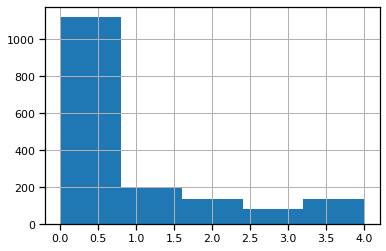

In [13]:
df['label_confidence_encoded'].hist(bins=5)


In [14]:
# from abraham 2013:

# 4 = certain
# 3 = 75% tidal
# 2 = 50% tidal
# 1 = hint, very uncertain
# 0 = no evidence of tidal


label_confidence_encoded_to_prob = {
    4: 1.,
    3: 0.75,
    2: 0.5,
    1: 0.1,
    0: 0.
}
df['label_confidence_as_prob'] = df['label_confidence_encoded'].apply(lambda x: label_confidence_encoded_to_prob[x])

### Remove unused filenames

In [15]:
df['filename'] = df['color_filename'].str.replace('.fits', '.jpg', regex=False)  # these are correct except for the .fits

In [16]:
df.columns.values

array(['meta_index', 'index', 'id_str', 'CONF', 'FEAT', 'ra', 'dec',
       'zph', 'rMag', 'MvMsun', 'grMag', 'RvB', 'url', 'field',
       'xloc_min', 'xloc_max', 'yloc_min', 'yloc_max', 'xloc_c', 'yloc_c',
       'x_width', 'y_width', 'raw_url_id', 'picture_id', 'filename',
       'errors', 'stacked_filename', 'color_filename', 'masked_filename',
       'threshold_5sig_filename', 'threshold_mask_5sig_filename',
       'threshold_bkg_5sig_filename', 'threshold_color_5sig_filename',
       'threshold_3sig_filename', 'threshold_mask_3sig_filename',
       'threshold_bkg_3sig_filename', 'threshold_color_3sig_filename',
       'label_str', 'label_confidence_encoded', 'finegrained_tidal_label',
       'coarse_tidal_label', 'label_confidence_as_prob'], dtype=object)

In [17]:
df = df[['id_str', 'ra', 'dec', 'filename', 'label_str', 'finegrained_tidal_label', 'coarse_tidal_label', 'label_confidence_as_prob']]

In [18]:
df

,id_str,ra,dec,filename,label_str,finegrained_tidal_label,coarse_tidal_label,label_confidence_as_prob
1,W1-3,30.201271,-11.144945,W1-3_color.jpg,N,0,0,0.10
2,W1-4,30.391056,-11.107487,W1-4_color.jpg,N,0,0,0.00
4,W1-8,30.493235,-11.019429,W1-8_color.jpg,N,0,0,0.00
5,W1-9,30.513254,-10.806742,W1-9_color.jpg,N,0,0,0.00
6,W1-11,31.069776,-10.696386,W1-11_color.jpg,N,0,0,0.00
...,...,...,...,...,...,...,...,...
1754,W4-449,332.092743,3.993267,W4-449_color.jpg,N,0,0,0.00
1755,W4-452,332.673401,4.136741,W4-452_color.jpg,N,0,0,0.00
1756,W4-453,332.111176,4.225845,W4-453_color.jpg,N,0,0,0.00
1757,W4-456,332.441864,4.386792,W4-456_color.jpg,S,2,1,0.75


### Split into train/test, save, checksum

In [19]:
train_catalog, test_catalog = train_test_split(df, test_size=0.2, random_state=42)

train_catalog.to_parquet('/home/walml/repos/pytorch-galaxy-datasets/roots/tidal/tidal_train_catalog.parquet', index=False)
test_catalog.to_parquet('/home/walml/repos/pytorch-galaxy-datasets/roots/tidal/tidal_test_catalog.parquet', index=False)

In [20]:
import hashlib

for loc in [
    '/home/walml/repos/pytorch-galaxy-datasets/roots/tidal/tidal_train_catalog.parquet',
    '/home/walml/repos/pytorch-galaxy-datasets/roots/tidal/tidal_test_catalog.parquet',
    '/home/walml/repos/pytorch-galaxy-datasets/roots/tidal/tidal_images.tar.gz'  # compressed from images above, takes 5 secs
]:
    # print hash
    with open(loc, 'rb') as f:
        md5_checksum = hashlib.md5(f.read()).hexdigest()

    print(md5_checksum)

39def8527823f6d4f332fbc209b15a32
12a8c6a23ddc8e7ad3f5bd597931bbe3
1e10cd3a2a4a4c5fe39e447b2257e5f0
